In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# Hochladen der Datei um die Inhalte zu untersuchen 
vaccination_df = pd.read_csv('/Users/aleksandrakieler/Desktop/archive/Global COVID-19 Data (2020-2024)/Global COVID-19 Data (2020-2024)/vaccination-data.csv', on_bad_lines="skip", sep=';')

# Die ersten Zeilen des Datensatzes anzeigen, um ihre Struktur zu verstehen
vaccination_df.head(5)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100,Unnamed: 16
0,Aruba,ABW,AMRO,REPORTING,29/12/2023,217124,90493.0,203.0,85.0,84363.0,79.0,NaN,17/02/2021,NaN,35659.0,33.0,NaN
1,Afghanistan,AFG,EMRO,REPORTING,31/12/2023,2.30E+07,19200000.0,59.0,49.0,18400000.0,47.0,NaN,22/02/2021,NaN,2729940.0,7.0,NaN
2,Angola,AGO,AFRO,REPORTING,31/12/2023,2.78E+07,16600000.0,85.0,50.0,9609080.0,29.0,NaN,10/03/2021,NaN,3067091.0,9.0,NaN
3,Anguilla,AIA,AMRO,REPORTING,29/12/2023,24864,10858.0,166.0,72.0,10382.0,69.0,NaN,05/02/2021,NaN,3231.0,22.0,NaN
4,Albania,ALB,EURO,REPORTING,23/12/2023,3088966,1349255.0,107.0,47.0,1279333.0,44.0,NaN,13/01/2021,NaN,402371.0,14.0,NaN


Cleaning data from the dataset vaccintion-data (aka vaccination_df)

In [56]:
# Überprüfung fehlender Werte (NaN oder Nullwerte)
vaccination_df.isna().sum()

COUNTRY                                   0
ISO3                                      0
WHO_REGION                                5
DATA_SOURCE                               1
DATE_UPDATED                              4
TOTAL_VACCINATIONS                        6
PERSONS_VACCINATED_1PLUS_DOSE             6
TOTAL_VACCINATIONS_PER100                 8
PERSONS_VACCINATED_1PLUS_DOSE_PER100      8
PERSONS_LAST_DOSE                         6
PERSONS_LAST_DOSE_PER100                  8
VACCINES_USED                           214
FIRST_VACCINE_DATE                       20
NUMBER_VACCINES_TYPES_USED              214
PERSONS_BOOSTER_ADD_DOSE                 21
PERSONS_BOOSTER_ADD_DOSE_PER100          31
Unnamed: 16                             214
dtype: int64

In [57]:
vaccination_df.shape

(215, 17)

In [ ]:
# jedes Nullwerts in der Spalte 'DATA_SOURCE' wurde mit „REPORTING“ ausgefüllt
vaccination_df['DATA_SOURCE'] = vaccination_df['DATA_SOURCE'].fillna("REPORTING")

In [59]:
# Unbekannte Regionen mit „unknown“ ausfüllen
vaccination_df['WHO_REGION'] = vaccination_df['WHO_REGION'].fillna("UNKNOWN")

In [ ]:
# Zeile „DATE_UPDATED“ wurde wegen Inkonsistenz verworfen

vaccination_df = vaccination_df.drop(vaccination_df[vaccination_df['DATE_UPDATED'] == 'REPORTING'].index)

In [61]:
vaccination_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PERSONS_VACCINATED_1PLUS_DOSE,208.0,2.698693e+07,1.195326e+08,1638.0,450995.50,3749887.0,13675000.00,1.320000e+09
TOTAL_VACCINATIONS_PER100,206.0,1.543252e+02,8.574355e+01,4.0,82.25,154.5,222.25,4.700000e+02
PERSONS_VACCINATED_1PLUS_DOSE_PER100,206.0,6.288350e+01,2.406305e+01,4.0,45.25,67.0,83.00,1.000000e+02
PERSONS_LAST_DOSE,208.0,2.481236e+07,1.133418e+08,1635.0,394101.75,3335365.5,11375000.00,1.280000e+09
PERSONS_LAST_DOSE_PER100,206.0,5.786893e+01,2.420537e+01,3.0,39.00,62.5,77.75,1.000000e+02
VACCINES_USED,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERSONS_BOOSTER_ADD_DOSE,194.0,1.292126e+07,6.380919e+07,314.0,76000.50,834141.5,5276546.75,8.340000e+08
PERSONS_BOOSTER_ADD_DOSE_PER100,183.0,3.326776e+01,2.393626e+01,1.0,10.00,31.0,56.00,8.300000e+01
Unnamed: 16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Überprüft, ob der DataFrame Zeilen enthält.
# Iteriert durch jede angegebene Spalte.
# Kappt die Ausreißer in jeder Spalte mit winsorize.
# winsorize: Diese Funktion behandelt die Ausreißer in einem Datensatz.
# Das Argument limits=0.05 legt fest, dass die oberen und unteren 5% der Datenpunkte gekappt werden. 
# Das bedeutet, dass die Ausreißer durch die Werte am 5. und 95. Perzentil ersetzt werden.

from scipy.stats.mstats import winsorize

columns_to_check = ['PERSONS_VACCINATED_1PLUS_DOSE', 'TOTAL_VACCINATIONS_PER100','PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'PERSONS_LAST_DOSE', 'PERSONS_LAST_DOSE_PER100', 'PERSONS_BOOSTER_ADD_DOSE', 'PERSONS_BOOSTER_ADD_DOSE_PER100']

if vaccination_df.shape[0] > 0:  # Prüfen, ob Zeilen vorhanden sind
    for col in columns_to_check:
        vaccination_df[col] = winsorize(vaccination_df[col], limits=0.05)

In [63]:
vaccination_df.describe().T

/Users/aleksandrakieler/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/aleksandrakieler/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/aleksandrakieler/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/aleksandrakieler/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/aleksandrakieler/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partit

,count,mean,std,min,25%,50%,75%,max
PERSONS_VACCINATED_1PLUS_DOSE,211.0,1.581247e+07,2.793730e+07,25123.0,460217.0,3903802.0,14850000.00,105000000.0
TOTAL_VACCINATIONS_PER100,211.0,1.565118e+02,8.207403e+01,29.0,83.5,156.0,226.00,297.0
PERSONS_VACCINATED_1PLUS_DOSE_PER100,211.0,6.411848e+01,2.369027e+01,19.0,46.0,68.0,83.50,100.0
PERSONS_LAST_DOSE,211.0,1.468300e+07,2.667908e+07,23633.0,412207.5,3550673.0,12750000.00,103000000.0
PERSONS_LAST_DOSE_PER100,211.0,5.909953e+01,2.412871e+01,15.0,39.5,63.0,79.00,99.0
VACCINES_USED,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERSONS_BOOSTER_ADD_DOSE,194.0,1.292136e+07,6.380917e+07,3726.0,76000.5,834141.5,5276546.75,834000000.0
PERSONS_BOOSTER_ADD_DOSE_PER100,183.0,3.332240e+01,2.386477e+01,3.0,10.0,31.0,56.00,83.0
Unnamed: 16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Prüfung auf Duplikate in den Daten

vaccination_df.duplicated().sum()

0

In [65]:
vaccination_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 0 to 214
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               211 non-null    object 
 1   ISO3                                  211 non-null    object 
 2   WHO_REGION                            211 non-null    object 
 3   DATA_SOURCE                           211 non-null    object 
 4   DATE_UPDATED                          207 non-null    object 
 5   TOTAL_VACCINATIONS                    208 non-null    object 
 6   PERSONS_VACCINATED_1PLUS_DOSE         211 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             211 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  211 non-null    float64
 9   PERSONS_LAST_DOSE                     211 non-null    float64
 10  PERSONS_LAST_DOSE_PER100              211 non-null    float64
 11  VACCINES_USED           

In [66]:
# eine bestimmte Zeile in der Spalte 'TOTAL_VACCINATIONS' wegen Inkonsistenz und falschem Datentyp gelöscht

vaccination_df = vaccination_df.drop(vaccination_df[vaccination_df['TOTAL_VACCINATIONS'] == '18/10/2022'].index)

In [67]:
# Spalte 'TOTAL_VACCINATIONS' von Object auf Float geändert

vaccination_df['TOTAL_VACCINATIONS'] = vaccination_df['TOTAL_VACCINATIONS'].astype(float)

In [ ]:
# Jeder Nullwert in der Spalte 'TOTAL_VACCINATIONS' mit dem Durchschnittswert gefüllt

average_total_vac = vaccination_df['TOTAL_VACCINATIONS'].mean()

vaccination_df['TOTAL_VACCINATIONS'] = vaccination_df['TOTAL_VACCINATIONS'].fillna(average_total_vac)

In [ ]:
# Nullwerte in der Spalte 'PERSONS_VACCINATED_1PLUS_DOSE_PER100' wurden gedropped

vaccination_df = vaccination_df.dropna(subset=['PERSONS_VACCINATED_1PLUS_DOSE_PER100'])

In [70]:
vaccination_df.isna().sum()

COUNTRY                                   0
ISO3                                      0
WHO_REGION                                0
DATA_SOURCE                               0
DATE_UPDATED                              4
TOTAL_VACCINATIONS                        0
PERSONS_VACCINATED_1PLUS_DOSE             0
TOTAL_VACCINATIONS_PER100                 0
PERSONS_VACCINATED_1PLUS_DOSE_PER100      0
PERSONS_LAST_DOSE                         0
PERSONS_LAST_DOSE_PER100                  0
VACCINES_USED                           211
FIRST_VACCINE_DATE                       16
NUMBER_VACCINES_TYPES_USED              211
PERSONS_BOOSTER_ADD_DOSE                 17
PERSONS_BOOSTER_ADD_DOSE_PER100          28
Unnamed: 16                             211
dtype: int64

In [71]:
# Spalte „Unbenannt: 16“ entfällt, da es sich um eine leere Spalte handelt

vaccination_df = vaccination_df.drop(columns='Unnamed: 16')

In [72]:
# 'VACCINES_USED' und 'NUMBER_VACCINES_TYPES_USED' werden gelöscht, da keine Daten in den Spalten enthalten sind

vaccination_df = vaccination_df.drop(columns='VACCINES_USED')
vaccination_df = vaccination_df.drop(columns='NUMBER_VACCINES_TYPES_USED')

In [73]:
vaccination_df.isna().sum()

COUNTRY                                  0
ISO3                                     0
WHO_REGION                               0
DATA_SOURCE                              0
DATE_UPDATED                             4
TOTAL_VACCINATIONS                       0
PERSONS_VACCINATED_1PLUS_DOSE            0
TOTAL_VACCINATIONS_PER100                0
PERSONS_VACCINATED_1PLUS_DOSE_PER100     0
PERSONS_LAST_DOSE                        0
PERSONS_LAST_DOSE_PER100                 0
FIRST_VACCINE_DATE                      16
PERSONS_BOOSTER_ADD_DOSE                17
PERSONS_BOOSTER_ADD_DOSE_PER100         28
dtype: int64

In [74]:
vaccination_df.shape

(211, 14)

In [75]:
# Die Nullwerte in der Spalte 'FIRST_VACCINE_DATE' werden mit 'unknown' gefüllt

vaccination_df['FIRST_VACCINE_DATE'] =vaccination_df['FIRST_VACCINE_DATE'].fillna('unknown')

In [76]:
# Die Nullwerte in den Spalten 'PERSONEN_BOOSTER_ADD_DOSE' und 'PERSONEN_BOOSTER_ADD_DOSE_PER100' werden mit dem Durchschnittswert für jede Spalte gefüllt

average_PERSONS_BOOSTER_ADD_DOSE = vaccination_df['PERSONS_BOOSTER_ADD_DOSE'].mean()
vaccination_df['PERSONS_BOOSTER_ADD_DOSE'] = vaccination_df['PERSONS_BOOSTER_ADD_DOSE'].fillna(average_PERSONS_BOOSTER_ADD_DOSE)


average_PERSONS_BOOSTER_ADD_DOSE_PER100 = vaccination_df['PERSONS_BOOSTER_ADD_DOSE_PER100'].mean()
vaccination_df['PERSONS_BOOSTER_ADD_DOSE_PER100'] = vaccination_df['PERSONS_BOOSTER_ADD_DOSE_PER100'].fillna(average_PERSONS_BOOSTER_ADD_DOSE_PER100)

In [77]:
# Keine Nullwerte, keine Duplikate, keine Inkonsistenzen, keine falschen Datentypen, Ausreißer werden entfernt, alle Spalten werden bereinigt

vaccination_df.isna().sum()

COUNTRY                                 0
ISO3                                    0
WHO_REGION                              0
DATA_SOURCE                             0
DATE_UPDATED                            4
TOTAL_VACCINATIONS                      0
PERSONS_VACCINATED_1PLUS_DOSE           0
TOTAL_VACCINATIONS_PER100               0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    0
PERSONS_LAST_DOSE                       0
PERSONS_LAST_DOSE_PER100                0
FIRST_VACCINE_DATE                      0
PERSONS_BOOSTER_ADD_DOSE                0
PERSONS_BOOSTER_ADD_DOSE_PER100         0
dtype: int64

Cleaning of data for the dataset vaccination-metadata (aka vaccination_type_df)

DATA VISUALISATION 

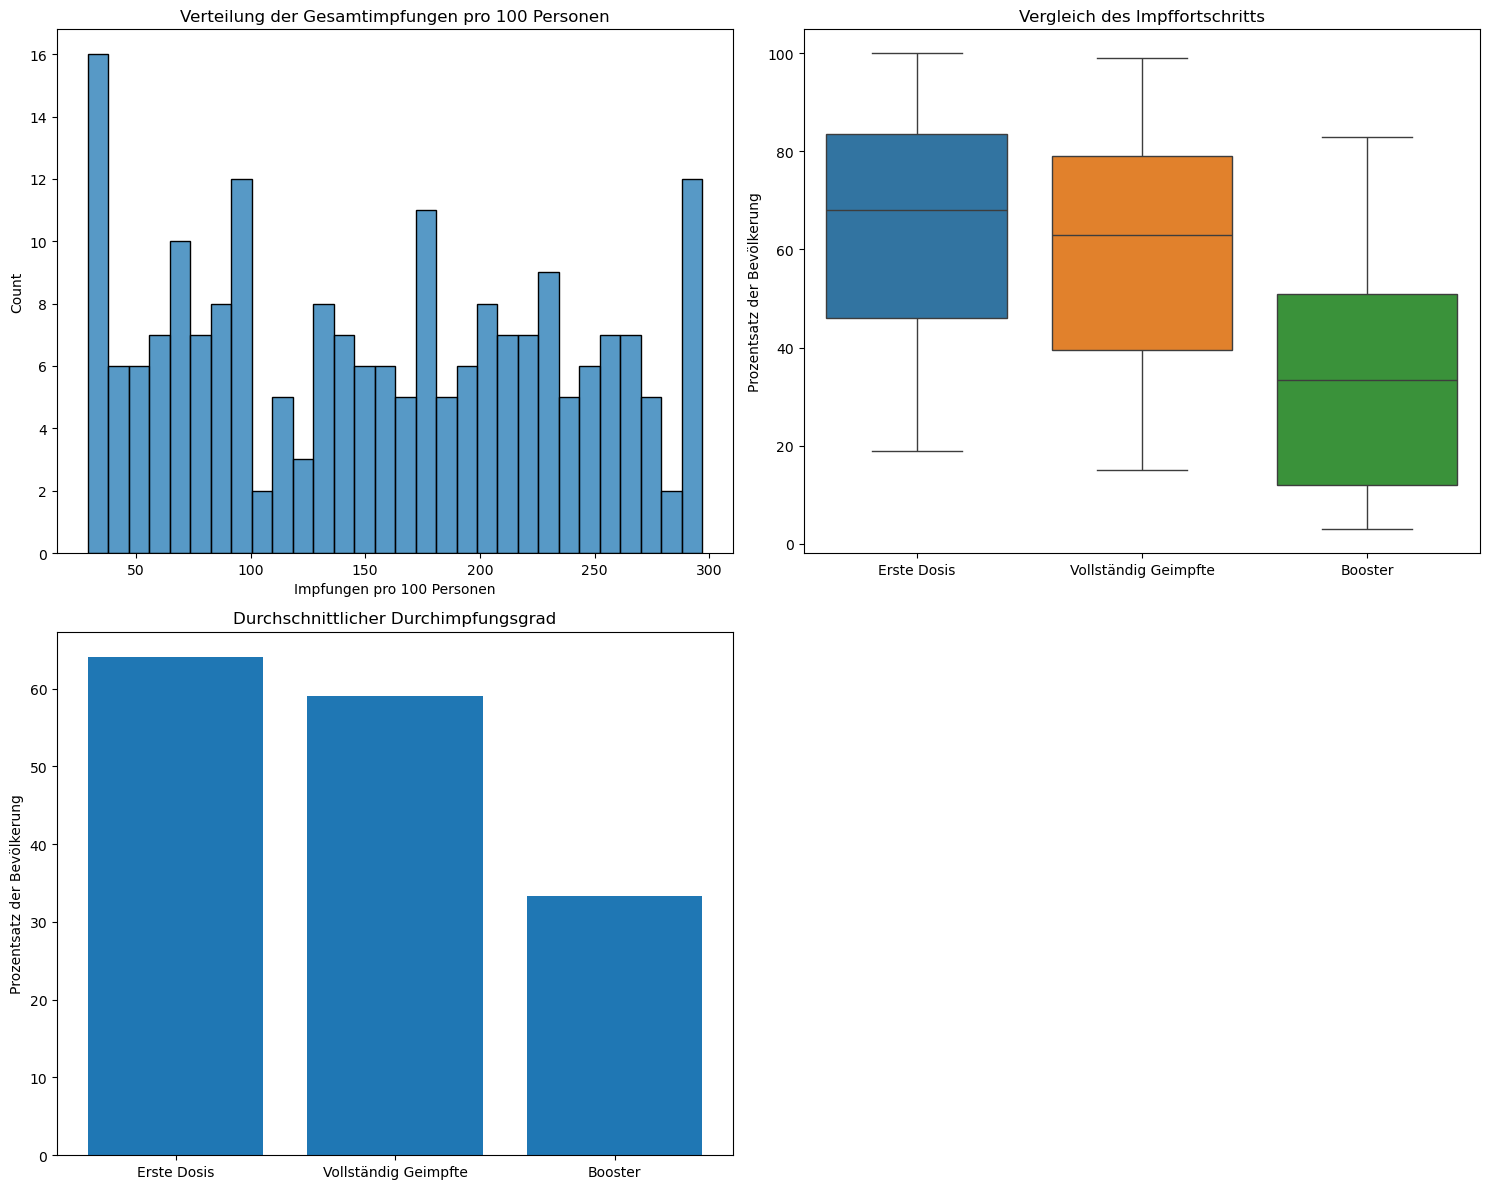

,Metric,Value
0,Erste Dosen insgesamt (Millionen),15.812471
1,Vollimpfungen insgesamt (Millionen),14.682999
2,Booster insgesamt (Millionen),12.921357
3,Durchschnittlicher Deckungsgrad der ersten Dos...,64.118483
4,Durchschnittlich vollständiger Impfschutz (%),59.099526
5,Avg Booster-Abdeckung (%),33.322404


In [78]:
def analyze_vaccination_data(vaccination_df):
    """
    Umfassende Analyse von Impfdaten
    """
    # Create visualizations
    plt.figure(figsize=(15, 12))

    # Distribution of vaccination rates
    plt.subplot(2, 2, 1)
    sns.histplot(data=vaccination_df['TOTAL_VACCINATIONS_PER100'], bins=30)
    plt.title('Verteilung der Gesamtimpfungen pro 100 Personen')
    plt.xlabel('Impfungen pro 100 Personen')

    # Comparison between first dose and full vaccination
    plt.subplot(2, 2, 2)
    vaccination_data = pd.DataFrame({
        'Erste Dosis': vaccination_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'],
        'Vollständig Geimpfte': vaccination_df['PERSONS_LAST_DOSE_PER100'],
        'Booster': vaccination_df['PERSONS_BOOSTER_ADD_DOSE_PER100']
    })
    sns.boxplot(data=vaccination_data)
    plt.title('Vergleich des Impffortschritts')
    plt.ylabel('Prozentsatz der Bevölkerung')

    # Vaccination coverage analysis
    plt.subplot(2, 2, 3)
    coverage_data = {
        'Erste Dosis': vaccination_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'].mean(),
        'Vollständig Geimpfte': vaccination_df['PERSONS_LAST_DOSE_PER100'].mean(),
        'Booster': vaccination_df['PERSONS_BOOSTER_ADD_DOSE_PER100'].mean()
    }
    plt.bar(coverage_data.keys(), coverage_data.values())
    plt.title('Durchschnittlicher Durchimpfungsgrad')
    plt.ylabel('Prozentsatz der Bevölkerung')

    # Statistical summary
    stats_summary = {
        'Metric': [
            'Erste Dosen insgesamt (Millionen)',
            'Vollimpfungen insgesamt (Millionen)',
            'Booster insgesamt (Millionen)',
            'Durchschnittlicher Deckungsgrad der ersten Dosis (%)',
            'Durchschnittlich vollständiger Impfschutz (%)',
            'Avg Booster-Abdeckung (%)'
        ],
        'Value': [
            vaccination_df['PERSONS_VACCINATED_1PLUS_DOSE'].mean() / 1e6,
            vaccination_df['PERSONS_LAST_DOSE'].mean() / 1e6,
            vaccination_df['PERSONS_BOOSTER_ADD_DOSE'].mean() / 1e6,
            vaccination_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'].mean(),
            vaccination_df['PERSONS_LAST_DOSE_PER100'].mean(),
            vaccination_df['PERSONS_BOOSTER_ADD_DOSE_PER100'].mean()
        ]
    }

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(stats_summary)
analyze_vaccination_data(vaccination_df)